In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
!curl https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii >> 'monthly.ao.index.b50.current.ascii'
#!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
#https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20875  100 20875    0     0   8997      0  0:00:02  0:00:02 --:--:--  8997


In [19]:
!ls

GSPC.csv
eda_data.ipynb
monthly.ao.index.b50.current.ascii
monthly.ao.index.b50.current.ascii.sb-bb7410a2-hiADdr
monthly.ao.index.b50.current.ascii.sb-bb7410a2-hiADdr.sb-bb7410a2-Rby5yi


In [21]:
ao = np.loadtxt('monthly.ao.index.b50.current.ascii')

In [26]:


ao[0:2]

ao.shape
dates = pd.date_range('1950-01', periods=ao.shape[0], freq='M')
dates
AO = Series(ao[:,2], index=dates)



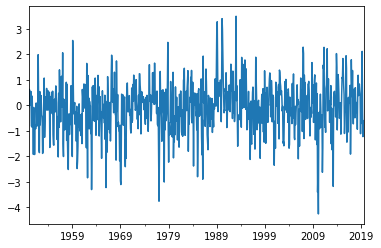

In [27]:
AO.plot()

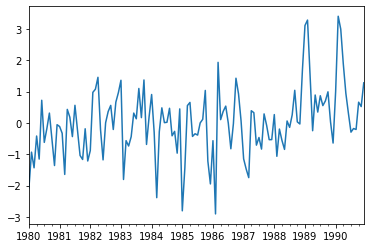

In [28]:
AO['1980':'1990'].plot()

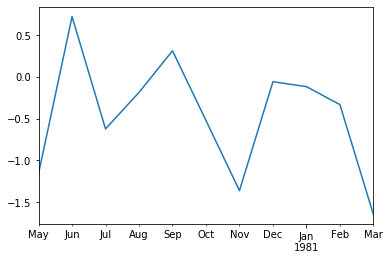

In [29]:


AO['1980-05':'1981-03'].plot()



In [30]:
AO['1960-01']

1960-01-31   -2.4842
Freq: M, dtype: float64

In [31]:


AO['1960']



1960-01-31   -2.484200
1960-02-29   -2.212400
1960-03-31   -1.624600
1960-04-30   -0.297310
1960-05-31   -0.857430
1960-06-30    0.054978
1960-07-31   -0.619060
1960-08-31   -1.007900
1960-09-30   -0.381640
1960-10-31   -1.187000
1960-11-30   -0.553230
1960-12-31   -0.342950
Freq: M, dtype: float64

In [32]:


AO[AO > 0]



1950-02-28    0.626810
1950-04-30    0.555100
1950-05-31    0.071577
1950-06-30    0.538570
1950-09-30    0.357970
                ...   
2018-09-30    0.584510
2018-10-31    0.412770
2018-12-31    0.109730
2019-02-28    1.149500
2019-03-31    2.116100
Length: 392, dtype: float64

In [33]:
!curl http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii >> 'norm.nao.monthly.b5001.current.ascii'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   158    0   158    0     0    195      0 --:--:-- --:--:-- --:--:--   195


In [35]:
nao = np.loadtxt('norm')
dates_nao = pd.date_range('1950-01', periods=nao.shape[0], freq='M')
NAO = Series(nao[:,2], index=dates_nao)


In [36]:
NAO.index

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
               '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31'],
              dtype='datetime64[ns]', length=835, freq='M')

In [38]:
aonao = DataFrame({'AO' : AO, 'NAO' : NAO})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f0a0d30>,
      dtype=object)

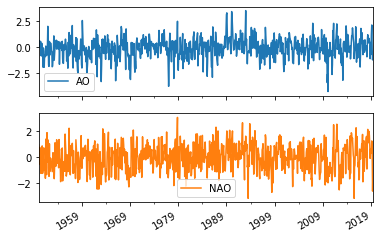

In [40]:
aonao.plot(subplots=True)

In [41]:


aonao.head()



,AO,NAO
1950-01-31,-0.060310,0.92
1950-02-28,0.626810,0.40
1950-03-31,-0.008127,-0.36
1950-04-30,0.555100,0.73
1950-05-31,0.071577,-0.59


In [43]:
type(aonao)

pandas.core.frame.DataFrame

In [47]:
aonao['1981-02':'1981']

,AO,NAO
1981-02-28,-0.33158,0.92
1981-03-31,-1.64470,-1.19
1981-04-30,0.43041,0.36
1981-05-31,0.17956,0.20
1981-06-30,-0.43793,-0.45
1981-07-31,0.56055,0.05
1981-08-31,-0.24411,0.39
1981-09-30,-1.04010,-1.45
1981-10-31,-1.16750,-1.35
1981-11-30,-0.18767,-0.38


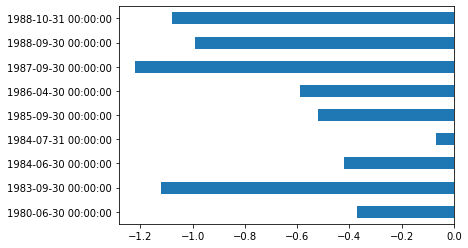

In [48]:
import datetime
aonao.loc[(aonao.AO > 0) & (aonao.NAO < 0) 
        & (aonao.index > datetime.datetime(1980,1,1)) 
        & (aonao.index < datetime.datetime(1989,1,1)),
        'NAO'].plot(kind='barh')



In [50]:
aonao['1981-02':'1981'].mean()



AO    -0.463525
NAO   -0.265455
dtype: float64

In [51]:


aonao.describe()



,AO,NAO
count,835.000000,835.000000
mean,-0.106289,-0.002279
std,1.001484,1.020906
min,-4.265700,-3.180000
25%,-0.650820,-0.750000
50%,-0.037912,0.060000
75%,0.484310,0.710620
max,3.495300,3.040000


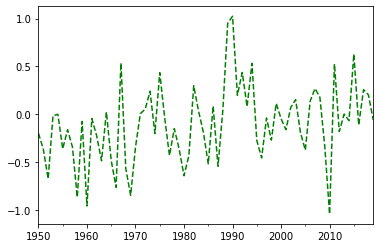

In [52]:
AO_mm = AO.resample("A").mean()
AO_mm.plot(style='g--')

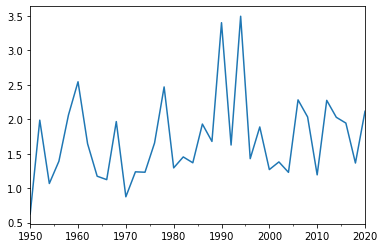

In [57]:
AO_mm = AO.resample("2A").apply(np.max)
AO_mm.plot()

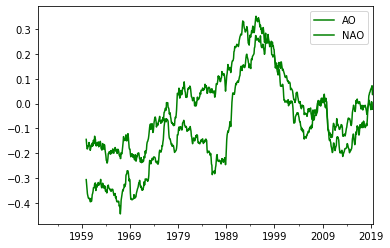

In [58]:
aonao.rolling(window=120, center=False).mean().plot(style='-g')

In [60]:
import pandas as pd
import quandl
import datetime
 
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
s = "AAPL"
apple = quandl.get("WIKI/" + s, start_date=start, end_date=end)
 
type(apple)

pandas.core.frame.DataFrame

Populating the interactive namespace from numpy and matplotlib


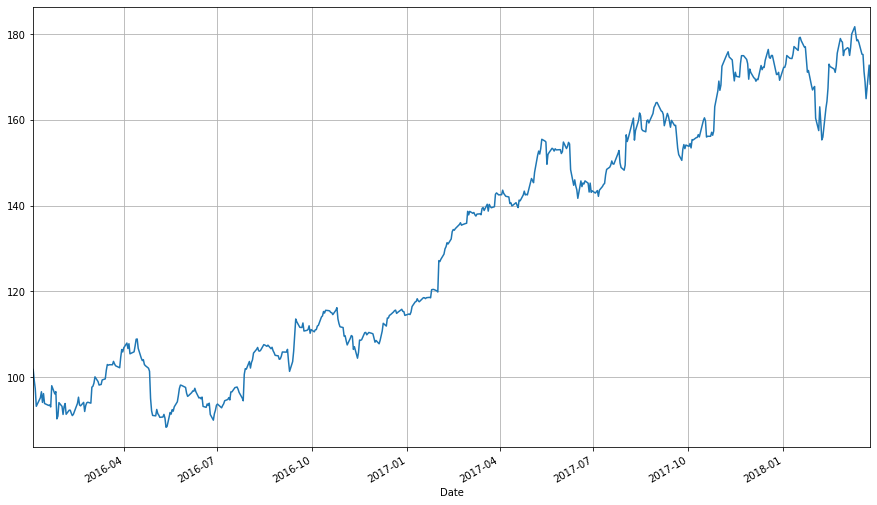

In [61]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
apple["Adj. Close"].plot(grid = True) # Plot the adjusted closing price of AAPL